In [57]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [58]:
import sys
sys.path.insert(1, '../Classes/classe/')

from ClassGrafico import Grafico
from ClassArquivo import Arquivo_DataFrame
from ClassGeraArquivo import GeraArquivo

In [59]:
# CONFIGURANDO A EXIBIÇAO DE REGISTROS NA TELA #

pd.options.display.max_rows = 999
pd.options.display.max_columns=999
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [60]:
arquivoDadosPesquisa = '../Pesquisa/Dados/Pesquisa Mentoria Quintellão Free 2023.csv'

arquivoRegioesBrasil = '../REGIOES_BRASIL.csv'

## Importação do Arquivo Regiões Brasil

In [61]:
sep = ';'
encoding = 'utf-8'
header = 0
numeroColunas = [0,1,2,3]
nomeColunas = ['UF','Estado','Capital','Regiao']
parametro = 0
sheet_name = ''
index = False
data = ''

dataframe = Arquivo_DataFrame(arquivoRegioesBrasil, sep, encoding, header,numeroColunas, nomeColunas, parametro, sheet_name, index)

dfDadosRegiao = dataframe.carregaArquivoCSV()


In [62]:
dfDadosRegiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   UF       27 non-null     object
 1   Estado   27 non-null     object
 2   Capital  27 non-null     object
 3   Regiao   27 non-null     object
dtypes: object(4)
memory usage: 992.0+ bytes


## Importação do Arquivo Pesquisa

In [63]:
sep = ','
encoding = 'utf-8'
header = 0
numeroColunas = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
nomeColunas = ['DataPreenchimento','DscEmail','Nome','Idade','Cidade','Estado','Pais','Formacao','EstaTrabalhando','SuaFuncao',
'TransicaoCarreira','MotivoTransicaoCarreira','TrabalhouComBI','TrabalhouComBD','QualBD','AtuacaoBD','Conhece_BI_BigData',
'ResumoConhecimento','PossuiPlanoEstudo','AdministracaoPlanoEstudo','ConheceNuvem','QualNuvemConhece','DificuldadeEmOportunidade',
'QualAreaBusca','OuraArea','PeriodoMentoria','OutroPeriodoMentoria','EsperaMentoria','InteresseEmParticiparMentoria','EnvioMensagemMentoriaSite',
'Id','Proprietário','DataCriacao','DataAtuaaazação']
parametro = 0

sheet_name = 'teste'
index = False
data = ''

dataframe = Arquivo_DataFrame(arquivoDadosPesquisa, sep, encoding, header,numeroColunas, nomeColunas, parametro, sheet_name, index)

dfDadosPesquisa = dataframe.carregaArquivoCSV()

In [64]:
dfDadosPesquisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DataPreenchimento              19 non-null     object 
 1   DscEmail                       19 non-null     object 
 2   Nome                           19 non-null     object 
 3   Idade                          19 non-null     int64  
 4   Cidade                         19 non-null     object 
 5   Estado                         19 non-null     object 
 6   Pais                           19 non-null     object 
 7   Formacao                       19 non-null     object 
 8   EstaTrabalhando                19 non-null     object 
 9   SuaFuncao                      15 non-null     object 
 10  TransicaoCarreira              19 non-null     object 
 11  MotivoTransicaoCarreira        15 non-null     object 
 12  TrabalhouComBI                 19 non-null     objec

### Aplicar De-Para de Estado

In [65]:
dfDadosPesquisaTotalPorEstado = dfDadosPesquisa.groupby(['Estado'],as_index=False).agg(Total=('Estado', 'count'))

In [66]:
dfDadosPesquisaTotalPorEstado.loc[dfDadosPesquisaTotalPorEstado['Estado'].isin(['Minas Gerais, Brasil'
                                                                                ,'State of Minas Gerais, Brazil']), 'Estado'] = 'MG'

dfDadosPesquisaTotalPorEstado.loc[dfDadosPesquisaTotalPorEstado['Estado'].isin(['São Paulo'
                                                                                ,'São Paulo, SP, Brasil']), 'Estado'] = 'SP'

dfDadosPesquisaTotalPorEstado.loc[dfDadosPesquisaTotalPorEstado['Estado'].isin(['Rio de Janeiro'
                                                                                ,'Rio de Janeiro, RJ, Brasil'
                                                                                ,'Rio de Janeiro, Brasil']), 'Estado'] = 'RJ'

dfDadosPesquisaTotalPorEstado.loc[dfDadosPesquisaTotalPorEstado['Estado'].isin(['Espírito santo']), 'Estado'] = 'ES'

dfDadosPesquisaTotalPorEstado.loc[dfDadosPesquisaTotalPorEstado['Estado'].isin(['Alagoas, Brasil']), 'Estado'] = 'AL'

dfDadosPesquisaTotalPorEstado.loc[dfDadosPesquisaTotalPorEstado['Estado'].isin(['Brasília - DF, Brasil']), 'Estado'] = 'DF'

dfDadosPesquisaTotalPorEstado.loc[dfDadosPesquisaTotalPorEstado['Estado'].isin(['Bahia']), 'Estado'] = 'BA'

dfDadosPesquisaTotalPorEstado = dfDadosPesquisaTotalPorEstado.groupby(['Estado'],as_index=False).agg(Total=('Total', 'sum'))

dfDadosPesquisaTotalPorEstado

,Estado,Total
0,AL,2
1,BA,1
2,DF,1
3,ES,1
4,MG,3
5,RJ,7
6,SC,1
7,SP,3


In [67]:
dfDadosPesquisaTotalPorEstado = pd.merge(left=dfDadosPesquisaTotalPorEstado
                              , right=dfDadosRegiao
                              , left_on='Estado'
                              , right_on='UF'                                                                                              
                                    ).groupby(['Regiao'],as_index=False).agg(Total=('Total','sum'))

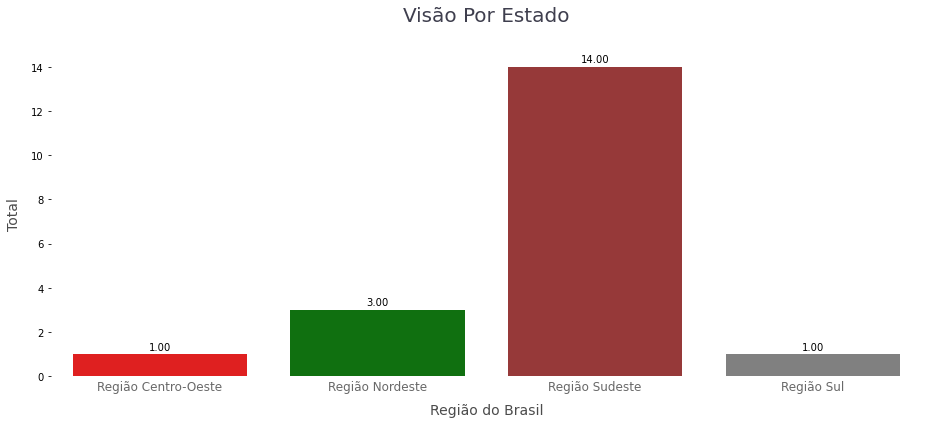

In [68]:
eixo_x = 'Regiao'
eixo_y = 'Total'
tituloGrafico = 'Visão Por Estado'
descricaoEixoX = 'Região do Brasil'
descricaoEixoY = 'Total'
variacao = .2
descritivo = ''
quantidade = 0

graficoEstaTrabalhando = Grafico(dfDadosPesquisaTotalPorEstado
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoEstaTrabalhando.geraGraficoBarra()

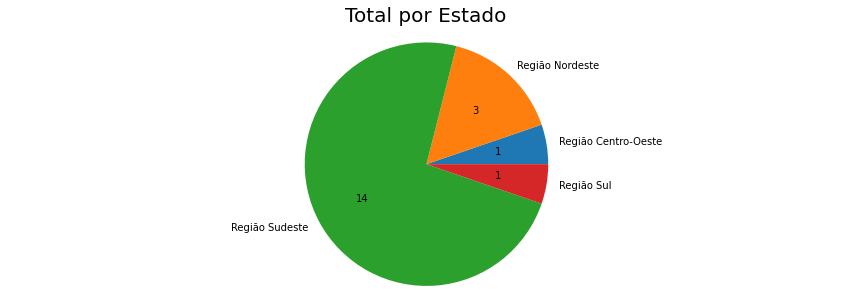

In [98]:
eixo_x = 'EstaTrabalhando'
eixo_y = 'QtdEstaTrabalhando'
tituloGrafico = 'Total por Estado'
descricaoEixoX = ''
descricaoEixoY = ''
variacao = .2
descritivo = dfDadosPesquisaTotalPorEstado['Regiao']
quantidade = dfDadosPesquisaTotalPorEstado['Total']

graficoTotalPorEstado = Grafico(dfDadosPesquisaTotalPorEstado
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoTotalPorEstado.geraGraficoPizza()

In [69]:
dfDadosPesquisaEstaTrabalhando = dfDadosPesquisa.groupby('EstaTrabalhando', as_index=False).agg(QtdEstaTrabalhando=('EstaTrabalhando','count'))

In [70]:
dfDadosPesquisaEstaTrabalhando.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EstaTrabalhando     2 non-null      object
 1   QtdEstaTrabalhando  2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


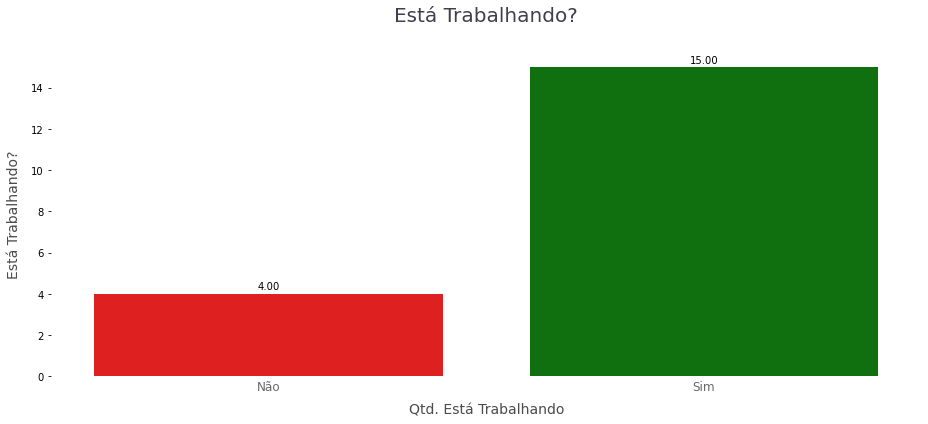

In [71]:
eixo_x = 'EstaTrabalhando'
eixo_y = 'QtdEstaTrabalhando'
tituloGrafico = 'Está Trabalhando?'
descricaoEixoX = 'Qtd. Está Trabalhando'
descricaoEixoY = 'Está Trabalhando?'
variacao = .2
descritivo = ''
quantidade = 0

graficoEstaTrabalhando = Grafico(dfDadosPesquisaEstaTrabalhando
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoEstaTrabalhando.geraGraficoBarra()

In [72]:
dfDadosPesquisaEstaTrabalhando

,EstaTrabalhando,QtdEstaTrabalhando
0,Não,4
1,Sim,15


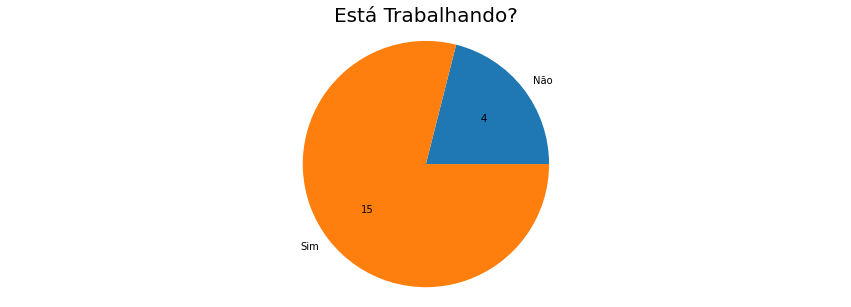

In [73]:
eixo_x = 'EstaTrabalhando'
eixo_y = 'QtdEstaTrabalhando'
tituloGrafico = 'Está Trabalhando?'
descricaoEixoX = 'Qtd. Está Trabalhando'
descricaoEixoY = 'Está Trabalhando?'
variacao = .2
descritivo = dfDadosPesquisaEstaTrabalhando['EstaTrabalhando']
quantidade = dfDadosPesquisaEstaTrabalhando['QtdEstaTrabalhando']

graficoEstaTrabalhando = Grafico(dfDadosPesquisaEstaTrabalhando
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoEstaTrabalhando.geraGraficoPizza()

In [74]:
dfDadosPesquisaTransicaoCarreira = dfDadosPesquisa.groupby('TransicaoCarreira', as_index=False).agg(QtdTransicaoCarreira = ('TransicaoCarreira','count'))

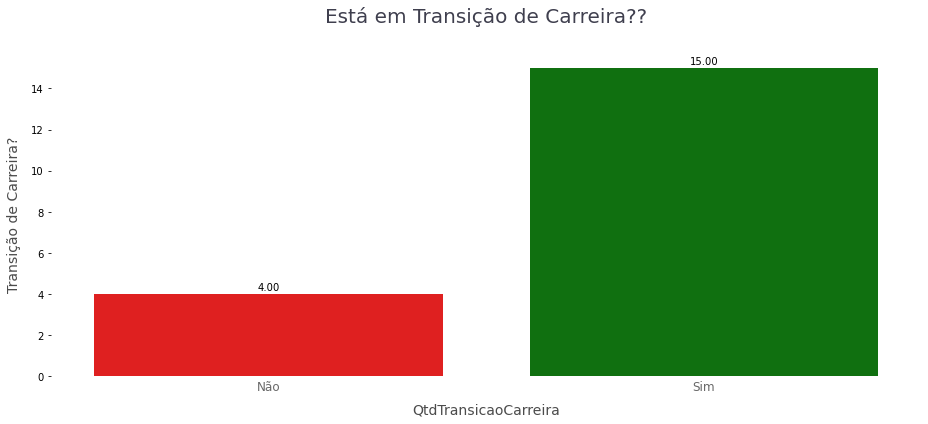

In [75]:
eixo_x = 'TransicaoCarreira'
eixo_y = 'QtdTransicaoCarreira'
tituloGrafico = 'Está em Transição de Carreira??'
descricaoEixoX = 'QtdTransicaoCarreira'
descricaoEixoY = 'Transição de Carreira?'
variacao = .2

graficoTransicaoCarreira = Grafico(dfDadosPesquisaTransicaoCarreira
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoTransicaoCarreira.geraGraficoBarra()

In [76]:
dfDadosPesquisaTrabalhouComBI = dfDadosPesquisa.groupby('TrabalhouComBI', as_index=False).agg(QtdTrabalhouComBI = ('TrabalhouComBI','count'))

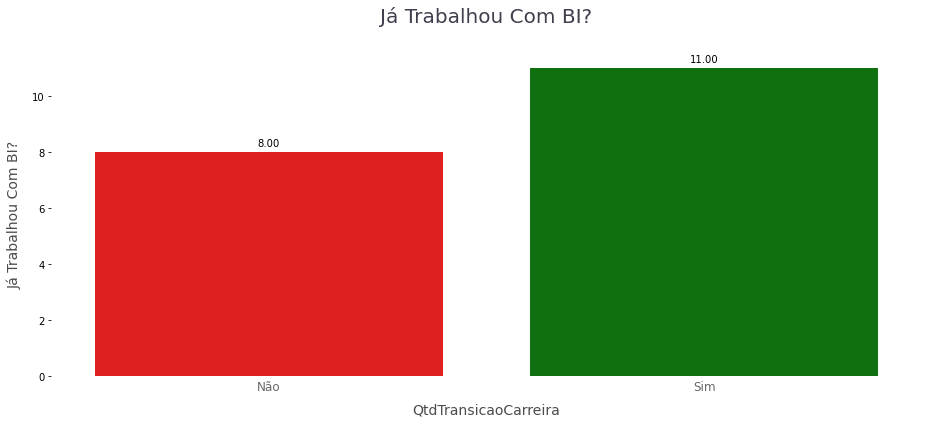

In [77]:
eixo_x = 'TrabalhouComBI'
eixo_y = 'QtdTrabalhouComBI'
tituloGrafico = 'Já Trabalhou Com BI?'
descricaoEixoX = 'QtdTransicaoCarreira'
descricaoEixoY = 'Já Trabalhou Com BI?'
variacao = .2

graficoTrabalhouComBI = Grafico(dfDadosPesquisaTrabalhouComBI
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoTrabalhouComBI.geraGraficoBarra()

In [78]:
dfDadosPesquisaTrabalhouComBD = dfDadosPesquisa.groupby(['TrabalhouComBD'], as_index=False).agg(QtdTrabalhouComBD = ('TrabalhouComBD','count')).head(30)

dfDadosPesquisaTrabalhouComBD

,TrabalhouComBD,QtdTrabalhouComBD
0,Não,5
1,Sim,14


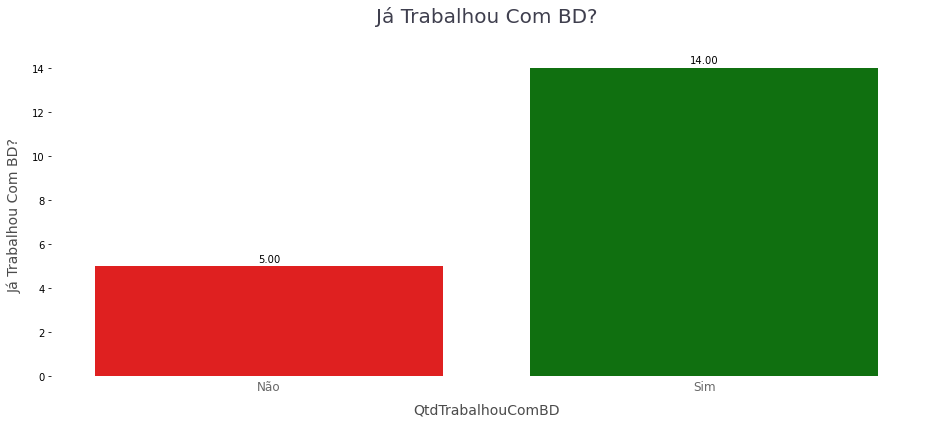

In [79]:
eixo_x = 'TrabalhouComBD'
eixo_y = 'QtdTrabalhouComBD'
tituloGrafico = 'Já Trabalhou Com BD?'
descricaoEixoX = 'QtdTrabalhouComBD'
descricaoEixoY = 'Já Trabalhou Com BD?'
variacao = .2

graficoTrabalhouComBD = Grafico(dfDadosPesquisaTrabalhouComBD
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoTrabalhouComBD.geraGraficoBarra()

In [80]:
dfDadosPesquisaQualBD = dfDadosPesquisa.groupby(['TrabalhouComBD','QualBD'], as_index=False) \
                                        .agg(QtdTrabalhouComBD = ('TrabalhouComBD','count'))

dfDadosPesquisaQualBD

# Create a list to store the unique values
unique_values = []

# Loop through each row in the DataFrame
for index, row in dfDadosPesquisaQualBD.iterrows():
    # Split the string into a list of values
    values = row['QualBD'].split(',')
    # Add the values to the unique_values list
    unique_values.extend(values)

# Convert the unique_values list to a set to remove duplicates
unique_values = set(unique_values)

type(unique_values)

# Create a new column in the DataFrame for each unique value
for value in unique_values:
    dfDadosPesquisaQualBD[value] = dfDadosPesquisaQualBD['QualBD'].apply(lambda x: value in x.split(',')).astype(int)

# Drop the original column containing the comma-separated values
dfDadosPesquisaQualBD = dfDadosPesquisaQualBD.drop('QualBD', axis=1)

# unpivot the DataFrame using melt()
dfDadosPesquisaQualBD = pd.melt(dfDadosPesquisaQualBD, id_vars=['QtdTrabalhouComBD'],   
                                value_name='QtdDatabase',
                                var_name='NomDatabase', 
                                value_vars=[' Azure',
 ' Ibm DB2',
 ' MongoDB',
 ' Mongodb',
 ' MySQL',
 ' Oracle',
 ' PostgreSQL',
 ' SQL server',
 'Access',
 'BigQuery',
 'MySQL',
 'Oracle',
 'SQL',
 'SQL Server',
 'SQL Server e MySQL',
 'SQL lite',
 'Sql server'])

dfDadosPesquisaQualBD



dfDadosPesquisaQualBD.loc[dfDadosPesquisaQualBD['NomDatabase'].isin([' Ibm DB2']), 'NomDatabase'] = 'IBM DB2'
dfDadosPesquisaQualBD.loc[dfDadosPesquisaQualBD['NomDatabase'].isin([' PostgreSQL',' PostgreSQL']), 'NomDatabase'] = 'PostgreSQL'
dfDadosPesquisaQualBD.loc[dfDadosPesquisaQualBD['NomDatabase'].isin(['Access']), 'NomDatabase'] = 'Access'
dfDadosPesquisaQualBD.loc[dfDadosPesquisaQualBD['NomDatabase'].isin(['BigQuery']), 'NomDatabase'] = 'BigQuery'
dfDadosPesquisaQualBD.loc[dfDadosPesquisaQualBD['NomDatabase'].isin([' MongoDB',' Mongodb']), 'NomDatabase'] = 'MongoDB'
dfDadosPesquisaQualBD.loc[dfDadosPesquisaQualBD['NomDatabase'].isin([' MySQL','MySQL']), 'NomDatabase'] = 'MySQL'
dfDadosPesquisaQualBD.loc[dfDadosPesquisaQualBD['NomDatabase'].isin([' Oracle','Oracle']), 'NomDatabase'] = 'Oracle'
dfDadosPesquisaQualBD.loc[dfDadosPesquisaQualBD['NomDatabase'].isin(['SQL','SQL Server','SQL Server e MySQL','Sql server','SQL lite',' SQL server',' Azure']), 'NomDatabase'] = 'SQL Server'

dfDadosPesquisaQualBD = dfDadosPesquisaQualBD.groupby('NomDatabase', as_index=False) \
                        .agg(QtdDatabase=('QtdDatabase','sum')) \
                        .sort_values(by='QtdDatabase', ascending=False)

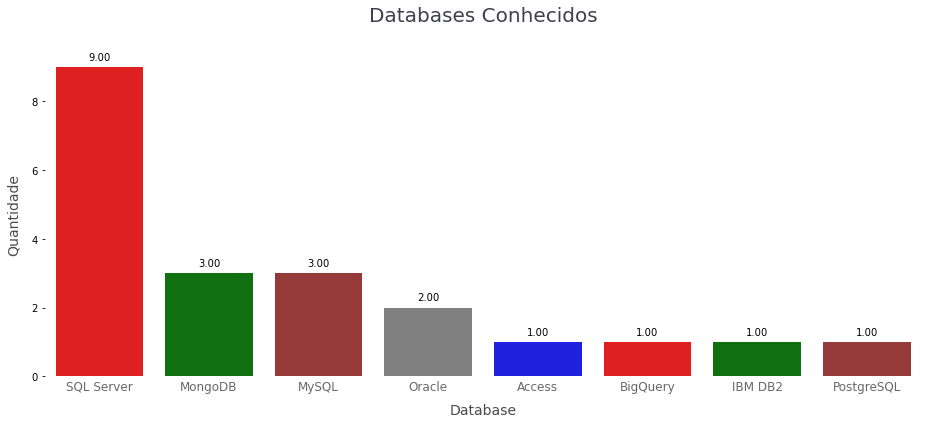

In [81]:
eixo_x = 'NomDatabase'
eixo_y = 'QtdDatabase'
tituloGrafico = 'Databases Conhecidos'
descricaoEixoX = 'Database'
descricaoEixoY = 'Quantidade'
variacao = .2

graficoConheceQualBD = Grafico(dfDadosPesquisaQualBD
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoConheceQualBD.geraGraficoBarra()

In [82]:
dfDadosPesquisaConhece_BI_BigData = dfDadosPesquisa.groupby(['Conhece_BI_BigData'], as_index=False).agg(QtdConhece_BI_BigData = ('Conhece_BI_BigData','count')).head(30)

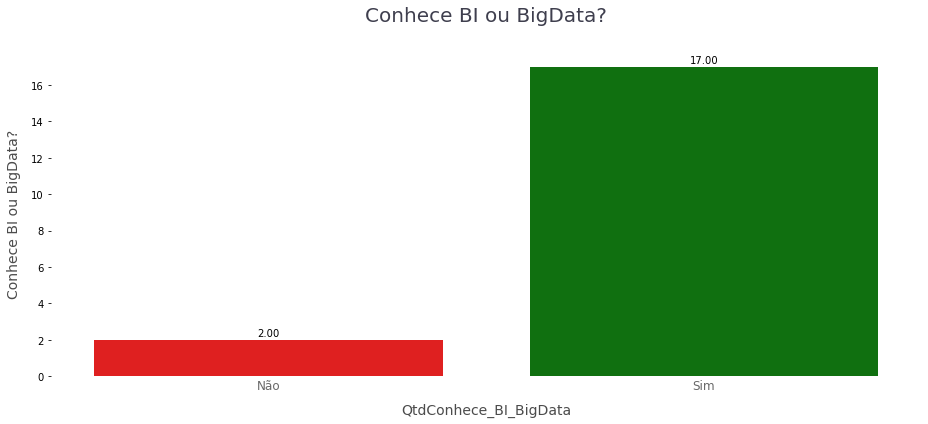

In [83]:
eixo_x = 'Conhece_BI_BigData'
eixo_y = 'QtdConhece_BI_BigData'
tituloGrafico = 'Conhece BI ou BigData?'
descricaoEixoX = 'QtdConhece_BI_BigData'
descricaoEixoY = 'Conhece BI ou BigData?'
variacao = .2

graficoConhece_BI_BigData = Grafico(dfDadosPesquisaConhece_BI_BigData
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoConhece_BI_BigData.geraGraficoBarra()

In [84]:
dfDadosPesquisaPossuiPlanoEstudo = dfDadosPesquisa.groupby(['PossuiPlanoEstudo'], as_index=False).agg(QtdPossuiPlanoEstudo = ('PossuiPlanoEstudo','count')).head(30)

dfDadosPesquisaPossuiPlanoEstudo

,PossuiPlanoEstudo,QtdPossuiPlanoEstudo
0,Não,10
1,Sim,9


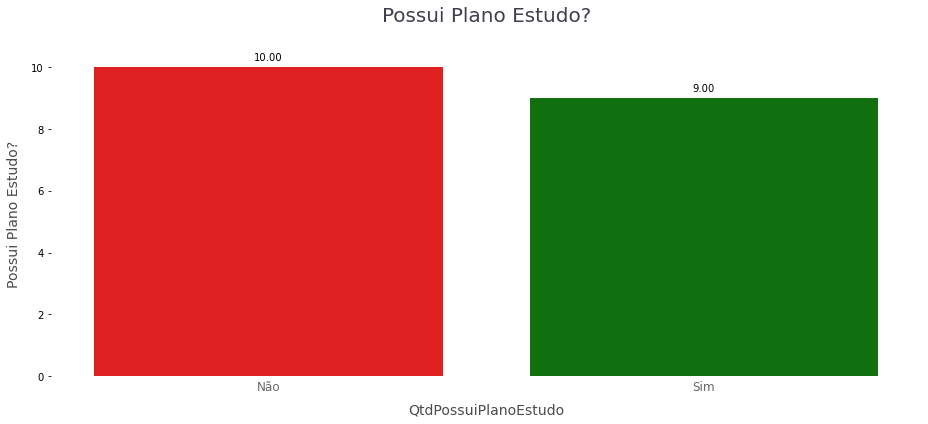

In [85]:
eixo_x = 'PossuiPlanoEstudo'
eixo_y = 'QtdPossuiPlanoEstudo'
tituloGrafico = 'Possui Plano Estudo?'
descricaoEixoX = 'QtdPossuiPlanoEstudo'
descricaoEixoY = 'Possui Plano Estudo?'
variacao = .2

graficoPossuiPlanoEstudo = Grafico(dfDadosPesquisaPossuiPlanoEstudo
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoPossuiPlanoEstudo.geraGraficoBarra()

In [86]:
dfDadosPesquisa.groupby(['PossuiPlanoEstudo','AdministracaoPlanoEstudo']).agg(QtdPossuiPlanoEstudo = ('PossuiPlanoEstudo','count')).head(30)

QtdPossuiPlanoEstudo
PossuiPlanoEstudo AdministracaoPlanoEstudo                                                
Sim               Atualmente eu faço um curso da plataforma hasht...                     1
                  Duas horas por dia.                                                    1
                  Fiz uma planilha e organizei os assuntos dividi...                     1
                  Me organizo diariamente a partir dos prazos de ...                     1
                  No meu caso eu venho olhando o que as vagas est...                     1
                  Por ordem de prioridade. Python > SQL > Power Bi                       1
                  Reservo cerce de 2h por dia para estudo, sempre...                     1
                  Segunda a Terça estudo de Python, SQL, ariflow,...                     1
                  Segunda, quarta e sexta curso da Ada.\nTerça e ...                     1

In [87]:
dfDadosPesquisaConheceNuvem = dfDadosPesquisa.groupby(['ConheceNuvem'], as_index=False).agg(QtdConheceNuvem = ('ConheceNuvem','count')).head(30)

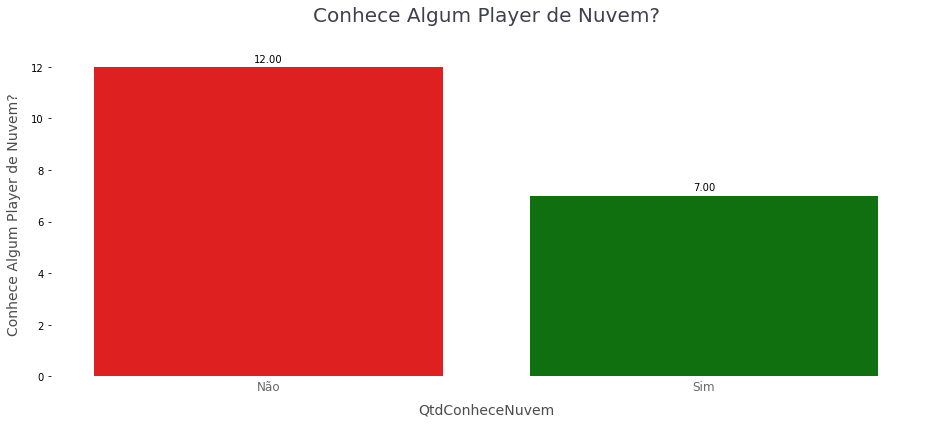

In [88]:
eixo_x = 'ConheceNuvem'
eixo_y = 'QtdConheceNuvem'
tituloGrafico = 'Conhece Algum Player de Nuvem?'
descricaoEixoX = 'QtdConheceNuvem'
descricaoEixoY = 'Conhece Algum Player de Nuvem?'
variacao = .2

graficoConheceNuvem = Grafico(dfDadosPesquisaConheceNuvem
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoConheceNuvem.geraGraficoBarra()

In [89]:
dfDadosPesquisaQualNuvemConhece = dfDadosPesquisa.groupby(['QualNuvemConhece'], as_index=False).agg(QtdConheceNuvem = ('QualNuvemConhece','count')).head(30)

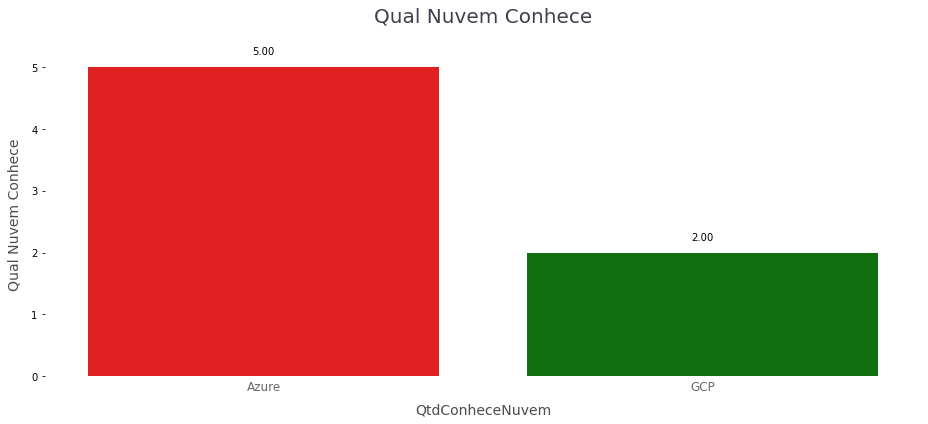

In [90]:
eixo_x = 'QualNuvemConhece'
eixo_y = 'QtdConheceNuvem'
tituloGrafico = 'Qual Nuvem Conhece'
descricaoEixoX = 'QtdConheceNuvem'
descricaoEixoY = 'Qual Nuvem Conhece'
variacao = .2

graficoConheceNuvem = Grafico(dfDadosPesquisaQualNuvemConhece
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoConheceNuvem.geraGraficoBarra()

In [91]:
dfDadosPesquisaQualAreaBusca = dfDadosPesquisa.groupby(['QualAreaBusca'], as_index=False).agg(QtdQualAreaBusca = ('QualAreaBusca','count')).head(30)

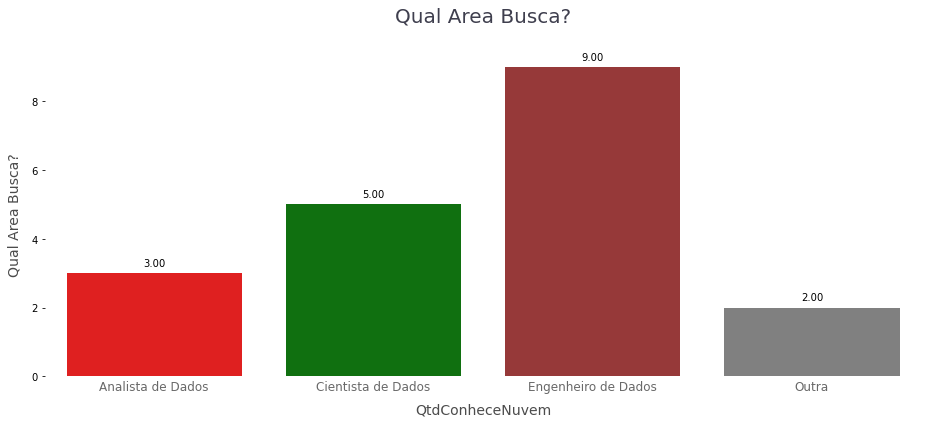

In [92]:
eixo_x = 'QualAreaBusca'
eixo_y = 'QtdQualAreaBusca'
tituloGrafico = 'Qual Area Busca?'
descricaoEixoX = 'QtdConheceNuvem'
descricaoEixoY = 'Qual Area Busca?'
variacao = .2

graficoQualAreaBusca = Grafico(dfDadosPesquisaQualAreaBusca
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoQualAreaBusca.geraGraficoBarra()

In [93]:
dfDadosPesquisa.groupby(['QualAreaBusca','OuraArea']).agg(QtdQualAreaBusca = ('QualAreaBusca','count')).head(30)

QtdQualAreaBusca
QualAreaBusca OuraArea                                                         
Outra         Na dúvida entre Engenheiro ou analista de dados                 1
              Na verdade ainda não decidi qual das áreas                      1

In [94]:
dfDadosPesquisaPeriodoMentoria = dfDadosPesquisa.groupby(['PeriodoMentoria'], as_index=False).agg(QtdPeriodoMentoria = ('PeriodoMentoria','count')).head(30)

Object `Mentoria` not found.


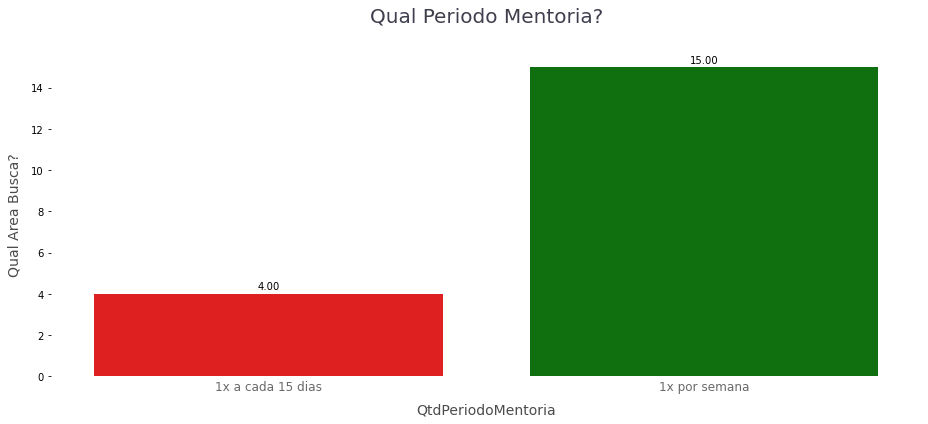

In [95]:
eixo_x = 'PeriodoMentoria'
eixo_y = 'QtdPeriodoMentoria'
tituloGrafico = 'Qual Periodo Mentoria?'
descricaoEixoX = 'QtdPeriodoMentoria'
descricaoEixoY = 'Qual Periodo Mentoria?
variacao = .2

graficoPeriodoMentoria = Grafico(dfDadosPesquisaPeriodoMentoria
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoPeriodoMentoria.geraGraficoBarra()

In [96]:
dfDadosPesquisaInteresseEmParticiparMentoria = dfDadosPesquisa.groupby(['InteresseEmParticiparMentoria'], as_index=False) \
                                                    .agg(QtdInteresseEmParticiparMentoria = ('InteresseEmParticiparMentoria'
                                                                                             ,'count')).head(30)

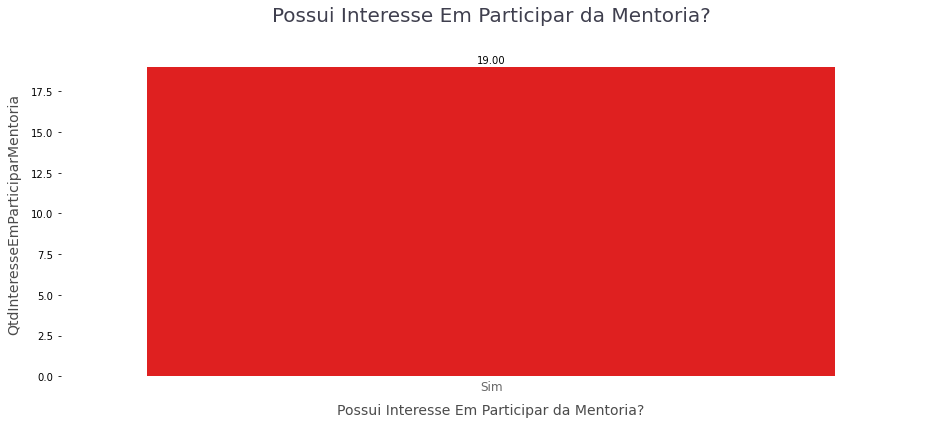

In [97]:
eixo_x = 'InteresseEmParticiparMentoria'
eixo_y = 'QtdInteresseEmParticiparMentoria'
tituloGrafico = 'Possui Interesse Em Participar da Mentoria?'
descricaoEixoX = 'Possui Interesse Em Participar da Mentoria?'
descricaoEixoY = 'QtdInteresseEmParticiparMentoria'
variacao = .2

graficoInteresseEmParticiparMentoria = Grafico(dfDadosPesquisaInteresseEmParticiparMentoria
                                 , eixo_x
                                    , eixo_y
                                    , tituloGrafico
                                    , descricaoEixoX
                                    , descricaoEixoY
                                    , variacao
                                    , descritivo
                                    , quantidade)

graficoInteresseEmParticiparMentoria.geraGraficoBarra()